2021-07-21

대회 설명을 통해서 코드 진행에 대해 생각해보았다.

이상치를 제거하는 작업을 했다.

1.이상치를 제거하기 전 전체 데이터

2.이상치를 제거한 데이터 

3.제거된 이상치 데이터

2는 고르게 분포된 것을 확인할 수 있었고

1과 3은 amount의 분포 범위는 넓은데 반해 분포는 한쪽으로 편중되어 확인이 어려운 것을 알 수 있었습니다.

2021-07-22


1. fill null
2. 필요한 변수 만들기
3. store_id 

2021-07-24
1. count
2. total
3. date & time(year,month)

2021-07-26
1. date & time(day,days_of_week,hour)
2. amount
3. total & installments

데이터를 가지고 추상적으로 생각하던 내용들을 분석과 시각화를 통해 확인할 수 있었음.

여러 시각화함수 특히, seaborn을 다양하게 활용하는 법을 배울 수 있었음.

모르는 함수에 대해 정리함.


# 대회 설명

대회 스폰서 : 뱅크샐러드

통합 자산조회, 맞춤형 자산관리, 금융상품 추천 등의 서비스를 제공하는 회사입니다.

또한, 마이데이터 사업(표준화된 정보 제공 방식을 통해 데이터의 주체인 국민, 즉 개인이 스스로 정보를 제공하고 관리할 수 있도록 하는 것을 말합니다.)을 시작으로 정부의 데이터 산업 활성화 전략에 앞장서 많은 사람들이 금융을 쉽게 알고, 부담없이 접근할 수 있도록 노력하고 있으며, 이러한 일환으로 이번 대회를 후원하게 되었습니다.

5회 대회는 1회 대회의 소상공인 신용카드 거래 내역 데이터를 사용하여 1회 대회에서 다 보여주지 못한 **인사이트 발굴 및 시각화 대회**를 진행합니다.

**R, Python의 시각화 패키지 및 라이브러리 등을 활용하여 데이터와 비즈니스를 보다 쉽게 이해할 수 있도록 시각화**해주세요.



[Submission]

평가자 및 데이콘 회원분들이 이해할 수 있도록 충분한 주석을 달아서 소스코드를 작성한 후 Markdown html(.html)로 해당 게시판에 작성하거나 

PDF파일(.pdf)을 다운 받아서 해당 게시판에 첨부하여 작성한 후, jupyter notebook, R 소스 코드(.ipynb, .R)를 첨부해주세요. 

불공정행위를 방지하기 위해서 1차 평가전까지 비공개 게시판으로 운영이 됩니다.

[File]

한국의 약 2,000개 상점의 신용카드 거래 내역이 제공됩니다. card_id를 기준으로 샘플링되었으며, amount의 단위는 KRW가 아닙니다.
**train.csv - 카드 매출 내역, 2016-08-01부터 2018-07-31까지.**

store_id 각 파일에서의 상점 고유 번호.

date 거래 일자

time 거래 시간

card_id 카드 번호의 hash 값

amount 매출액, 0보다 작은 음수는 거래 취소(환불)

installments 할부개월수. 일시불은 빈 문자열

days_of_week 요일, 월요일이 0, 일요일은 6

holyday 1이면 공휴일, 0이면 공휴일 아님

# Load & Check DataSet

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kaggle study/[4]credit card_visualization/train.csv')
train.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0


In [3]:
train.shape

(3362796, 8)

In [4]:
train.describe()

,store_id,amount,installments,days_of_week,holyday
count,3.362796e+06,3.362796e+06,16860.000000,3.362796e+06,3.362796e+06
mean,8.323770e+02,1.459623e+02,3.459490,3.066320e+00,4.431283e-02
std,5.468544e+02,6.017306e+02,2.382382,1.976153e+00,2.057892e-01
min,0.000000e+00,-2.500000e+05,2.000000,0.000000e+00,0.000000e+00
25%,3.350000e+02,3.200000e+01,3.000000,1.000000e+00,0.000000e+00
50%,8.220000e+02,7.500000e+01,3.000000,3.000000e+00,0.000000e+00
75%,1.342000e+03,1.500000e+02,3.000000,5.000000e+00,0.000000e+00
max,1.799000e+03,2.500000e+05,36.000000,6.000000e+00,1.000000e+00


# Preprocess

remove outlier

이상치가 있을 걸로 예상되는 column : amount

In [5]:
train['temp'] = 1 
train.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,temp
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0,1
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0,1
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0,1
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0,1
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0,1


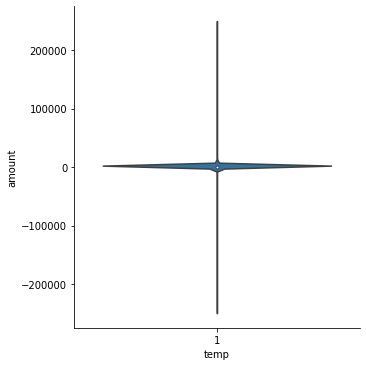

In [6]:
sns.catplot(data = train,x='temp',y="amount",kind='violin')

violinplot을 이용해 분포의 범위를 확인합니다.

amount의 분포 범위는 넓은데
분포는 한쪽으로 편중되어 확인이 어렵습니다.

따라서 numpy의 percentile을 이용해 데이터가 차지하는 비율을 확인해보겠습니다.

In [7]:
percentage_99 = np.percentile(train.amount,99)
percentage_99

1335.0

In [8]:
percentage_98 = np.percentile(train.amount,98)
percentage_98

800.0

In [9]:
print('amount_max: ',train.amount.max())
print('amount_min: ',train.amount.min())

amount_max:  250000
amount_min:  -250000


데이터의 99%가 차지하는 위치의 amount 값은1335

데이터의 98%가 차지하는 위치의 amount 값은 800 입니다.

이는 대부분의 data가 1000이하에 위치하고 있음을 의미합니다. 

따라서 1000이상, -1000 이하의 값을 outlier로 간주하겠습니다.

In [10]:
temp_train = train.loc[~((train.amount>=-1000)&(train.amount<=1000))]

In [11]:
train = train.loc[(train.amount>=-1000)& (train.amount<=1000)]

In [12]:
train.shape #(3362796, 8)->(3311411, 9) #	51385개 행 삭제

(3311411, 9)

In [13]:
train.tail(1)

,store_id,date,time,card_id,amount,installments,days_of_week,holyday,temp
3362795,1799,2018-07-30,10:58:53,42d354807a,325,NaN,0,0,1


In [14]:
train = train.reset_index()
train.tail(1)#(3311411, 9)

,index,store_id,date,time,card_id,amount,installments,days_of_week,holyday,temp
3311410,3362795,1799,2018-07-30,10:58:53,42d354807a,325,NaN,0,0,1


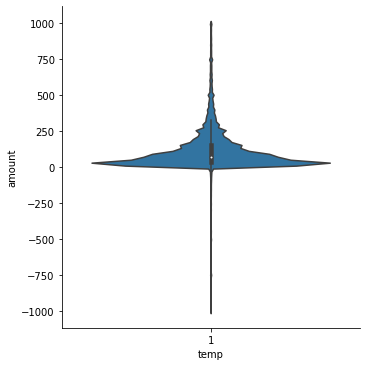

In [15]:
sns.catplot(data = train, x = 'temp', y = 'amount',kind = 'violin')

outlier를 제거하기 전보다 더 고르게 분포하는 것을 확인할 수 있습니다.

제거된 이상치에 대해서도 살펴봤습니다.

In [16]:
temp_train.describe()

,store_id,amount,installments,days_of_week,holyday,temp
count,51385.000000,51385.000000,7290.000000,51385.000000,51385.000000,51385.0
mean,883.811132,2216.665116,4.189849,2.803659,0.027109,1.0
std,491.726453,4252.068568,3.276972,1.852378,0.162403,0.0
min,0.000000,-250000.000000,2.000000,0.000000,0.000000,1.0
25%,476.000000,1220.000000,3.000000,1.000000,0.000000,1.0
50%,924.000000,1550.000000,3.000000,3.000000,0.000000,1.0
75%,1276.000000,2425.000000,5.000000,4.000000,0.000000,1.0
max,1799.000000,250000.000000,36.000000,6.000000,1.000000,1.0


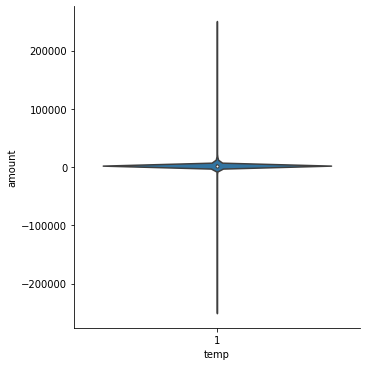

In [17]:
sns.catplot(data = temp_train, x = 'temp', y = 'amount',kind = 'violin')

In [18]:
temp_percentage_99 = np.percentile(temp_train.amount,99)
temp_percentage_99

15000.0

In [19]:
temp_percentage_98 = np.percentile(temp_train.amount,98)
temp_percentage_98

10000.0

# Fill in Null Data

In [20]:
train.isnull().sum() # train.isna().sum()

index                 0
store_id              0
date                  0
time                  0
card_id               0
amount                0
installments    3301841
days_of_week          0
holyday               0
temp                  0
dtype: int64

In [21]:
train.installments.value_counts()

3.0     6103
2.0     2773
5.0      407
6.0      139
4.0       80
12.0      26
9.0       14
10.0      13
8.0        6
7.0        5
22.0       4
Name: installments, dtype: int64

In [22]:
train.loc[train['installments'].isnull(),'installments'] = 1

In [23]:
train.isnull().sum()

index           0
store_id        0
date            0
time            0
card_id         0
amount          0
installments    0
days_of_week    0
holyday         0
temp            0
dtype: int64

installments의 null은 일시불을 의미하기 때문에, 분할 값을 모두 1로 채웠습니다.

# Make Total column

amount는 총액을 할부 단위로 계산한 금액입니다. 따라서 총액을 나타내는 total이라는 컬럼을 생성하겠습니다.

total = amount * installments

In [24]:
train['total'] = train.amount * train.installments

# Data Analysis & Feature Engineering

각 column을 분석하기에 앞서 column간의 correlation을 확인해보겠습니다

In [25]:
del train['temp']

In [26]:
train

,index,store_id,date,time,card_id,amount,installments,days_of_week,holyday,total
0,0,0,2016-12-14,18:05:31,d297bba73f,5,1.0,2,0,5.0
1,1,0,2016-12-14,18:05:54,d297bba73f,-5,1.0,2,0,-5.0
2,2,0,2016-12-19,12:42:31,0880849c05,144,1.0,0,0,144.0
3,3,0,2016-12-19,12:48:08,8b4f9e0e95,66,1.0,0,0,66.0
4,4,0,2016-12-19,13:31:08,7ad237eed0,24,1.0,0,0,24.0
...,...,...,...,...,...,...,...,...,...,...
3311406,3362791,1799,2018-07-19,17:58:31,e254bf70d9,600,1.0,3,0,600.0
3311407,3362792,1799,2018-07-19,18:54:34,8f41c89891,275,1.0,3,0,275.0
3311408,3362793,1799,2018-07-22,14:46:57,aeb64fe1fb,350,1.0,6,0,350.0
3311409,3362794,1799,2018-07-25,18:09:13,57932602d6,300,1.0,2,0,300.0


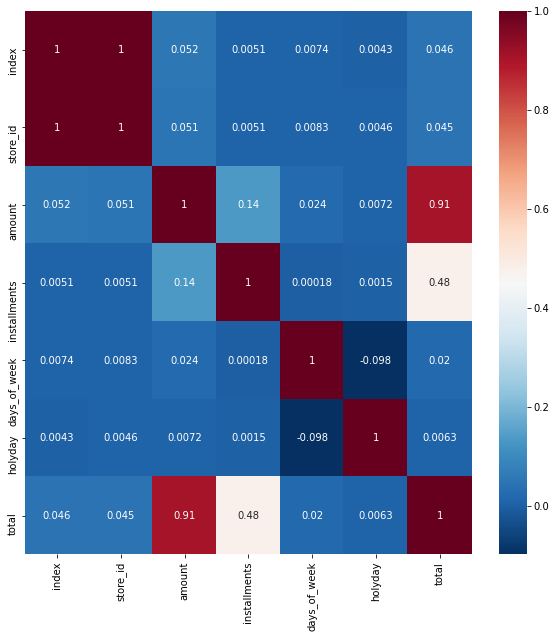

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),cmap='RdBu_r',annot=True) # annot 주석

# store_id

store_id의 빈도수를 시각화

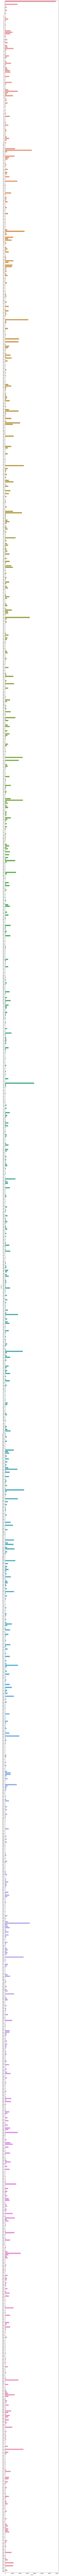

In [28]:
figure, ax = plt.subplots()
figure.set_size_inches(10,500)
sns.countplot(data=train,y='store_id')

store_id의 숨겨진 경향성을 확인하고자 하였지만, 따로 확인된 것은 없습니다.

가게마다 거래 기록 count 편차가 심하게 난다는 것을 확인할 수 있습니다.

sotre_id의 개수가 1799가 있기 때문에 countplot으로는 확인이 어렵습니다.

dataframe 형태로 거래 기록 상위 10개를 확인해보도록 하겠습니다.

In [29]:
count_list = []
for i in range(1799):
    train_temp = train.loc[train["store_id"] == i]
    values = {"count" : train_temp.shape[0]}
    count_list.append(values)

In [30]:
# count_list

In [31]:
count_list = pd.DataFrame.from_dict(count_list)

In [32]:
count_list = count_list.sort_values(by="count", ascending=False)
count_list.index.name = "store_id"
count_list.head(10)

,count
store_id,
0,68715
753,39217
105,35999
1342,33325
428,33281
221,31404
161,26108
1038,25694
323,25219


거래 기록이 많은 상위 10개의 가게를 확인했습니다.

가장 많은 거래 기록이 있는 store_id는 0이며, 68715(환불기록 포함)개의 거래가 있었습니다.

10번째로 거래 기록이 많은 store_id는 1366이며, 24940개의 거래 기록을 갖고 있습니다.

거래 기록 기준 상위 10개의 가게는 유동인구가 많은 곳에 위치해 접근성이 높거나,충성도 높은 고객을 보유하고 있음을 예측할 수 있습니다.

다음으로 거래 기록 기준 하위 10개의 리스트를 확인해보겠습니다.

In [33]:
count_list.tail(10)

,count
store_id,
951,0
617,0
1600,0
601,0
255,0
11,0
1681,0
1216,0
506,0


카드 거래 기록 기준 하위 10개 리스트에는 2016-08-01부터 2018-07-31까지 카드 거래 기록이 단 한 건도 발생하지 않은 가게로 이루어져있습니다.

카드 거래 기록이 단 한 건도 발생하지 않은 가게의 수를 확인해보겠습니다

거래 기록 0건

In [34]:
count_list_0 = count_list.loc[count_list['count'] == 0]
count_list_0.shape[0]

55

기간 중 카드 거래 기록이 단 한 건도 발생하지 않은 가게는 총 55개가 있습니다.

# total 매출액 기준

다음으로 매출액 기준 상의 10개의 store_id를 확인해보겠습니다.

In [35]:
total_list = []
for i in range(1799):
  train_temp = train.loc[train['store_id']==i]
  values = {'total':train_temp['total'].sum()}
  total_list.append(values)

In [36]:
total_list = pd.DataFrame.from_dict(total_list)
total_list.index.name = 'store_id'
total_list = total_list.sort_values(by='total',ascending = False)

In [37]:
total_list.head(10)

,total
store_id,
753,9353275.0
1342,7392831.0
0,5318111.0
161,4624716.0
1076,3781650.0
1024,2962918.0
104,2960875.0
1209,2863403.0
597,2787632.0


매출액이 가장 높은 store_id는 753으로 매출액은 9353275입니다.


10번째로 매출액이 높은 store_id는 105이며, 매출액은 2563178입니다.

가장 높은 매출액의 **약 1/4로 비교적 큰 차이**임을 확인할 수 있습니다


거래기록 기준 상위 10개 리스트 중, 5개의 store_id(753, 1342, 0, 161, 105)가 매출액 기준 상위 10개의 리스트에도 포함되어 있음을 확인할 수 있습니다.


다음으로 매출액 기준 하위 10개의 리스트를 확인해보겠습니다

In [38]:
total_list.tail(10)

,total
store_id,
601,0.0
1354,0.0
454,0.0
1231,0.0
1530,0.0
1649,0.0
1216,0.0
1582,0.0
1681,0.0


기간 중 카드 거래 기록이 단 한건도 발생하지 않은 가게가 55개 있었기 때문에,

**예상대로 매출액 기준 리스트의 하위 10개 가게의 매출액은 모두 0입니다.**

In [39]:
train

,index,store_id,date,time,card_id,amount,installments,days_of_week,holyday,total
0,0,0,2016-12-14,18:05:31,d297bba73f,5,1.0,2,0,5.0
1,1,0,2016-12-14,18:05:54,d297bba73f,-5,1.0,2,0,-5.0
2,2,0,2016-12-19,12:42:31,0880849c05,144,1.0,0,0,144.0
3,3,0,2016-12-19,12:48:08,8b4f9e0e95,66,1.0,0,0,66.0
4,4,0,2016-12-19,13:31:08,7ad237eed0,24,1.0,0,0,24.0
...,...,...,...,...,...,...,...,...,...,...
3311406,3362791,1799,2018-07-19,17:58:31,e254bf70d9,600,1.0,3,0,600.0
3311407,3362792,1799,2018-07-19,18:54:34,8f41c89891,275,1.0,3,0,275.0
3311408,3362793,1799,2018-07-22,14:46:57,aeb64fe1fb,350,1.0,6,0,350.0
3311409,3362794,1799,2018-07-25,18:09:13,57932602d6,300,1.0,2,0,300.0


# date & time

date 와 time column을 이용해 year, month, day, hour, minute, second column을 생성합니다.

In [40]:
train.loc[0,:]

index                    0
store_id                 0
date            2016-12-14
time              18:05:31
card_id         d297bba73f
amount                   5
installments             1
days_of_week             2
holyday                  0
total                    5
Name: 0, dtype: object

In [41]:
def split_date(date):
  return date.split('-')

In [42]:
train['date'].apply(lambda x: split_date(x))

0          [2016, 12, 14]
1          [2016, 12, 14]
2          [2016, 12, 19]
3          [2016, 12, 19]
4          [2016, 12, 19]
                ...      
3311406    [2018, 07, 19]
3311407    [2018, 07, 19]
3311408    [2018, 07, 22]
3311409    [2018, 07, 25]
3311410    [2018, 07, 30]
Name: date, Length: 3311411, dtype: object

In [43]:
train['year'],train['month'],train['day'] = zip(*train['date'].apply(lambda x: split_date(x)))
# 별표는 unzip을 의미

In [44]:
def split_time(time):
    return time.split(":")

In [45]:
train['hour'],train['minute'],train['second'] = zip(*train['time'].apply(lambda x: split_time(x)))
# 별표는 unzip을 의미

In [46]:
train.year.dtype # objects type

dtype('O')

In [47]:
train.year = train.year.astype(int)
train.month = train.month.astype(int)
train.day = train.day.astype(int)
train.hour = train.hour.astype(int)
train.minute = train.minute.astype(int)
train.second = train.second.astype(int)

In [48]:
train.head()

,index,store_id,date,time,card_id,amount,installments,days_of_week,holyday,total,year,month,day,hour,minute,second
0,0,0,2016-12-14,18:05:31,d297bba73f,5,1.0,2,0,5.0,2016,12,14,18,5,31
1,1,0,2016-12-14,18:05:54,d297bba73f,-5,1.0,2,0,-5.0,2016,12,14,18,5,54
2,2,0,2016-12-19,12:42:31,0880849c05,144,1.0,0,0,144.0,2016,12,19,12,42,31
3,3,0,2016-12-19,12:48:08,8b4f9e0e95,66,1.0,0,0,66.0,2016,12,19,12,48,8
4,4,0,2016-12-19,13:31:08,7ad237eed0,24,1.0,0,0,24.0,2016,12,19,13,31,8


## year

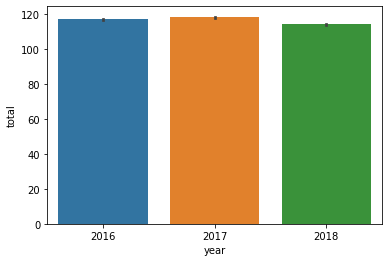

In [49]:
sns.barplot(data = train ,x = 'year', y = 'total')

연도별 평균 총액을 확인했습니다. 

2016년과 2018년은 1년 단위로 집계되지 않은 data이기 때문에 **barplot을 이용해 거래 기록 총액의 평균값(total/count)을 이용했습니다.**

2016년부터 2017년까지 매출액은 다소 올라갔지만, 2018년부터 매출액이 다소 줄어든 것을 확인할 수 있습니다.

## month

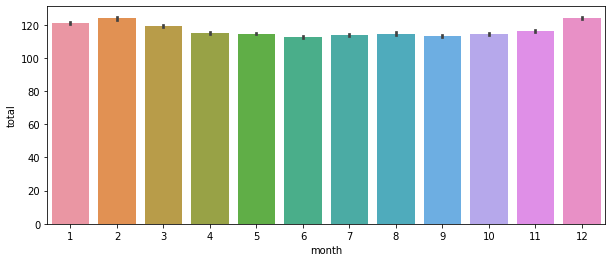

In [50]:
fig , ax = plt.subplots()
fig.set_size_inches(10,4)
sns.barplot(data = train, x = 'month', y = 'total')

**월별 평균 총액**을 확인했습니다.

12월이 가장 높았고, 6월이 가장 낮았습니다.

12월은 송년회 및 연말 할인이 빈번하기 때문에 경제 활동이 가장 많다고 예측해볼 수 있습니다.

## day

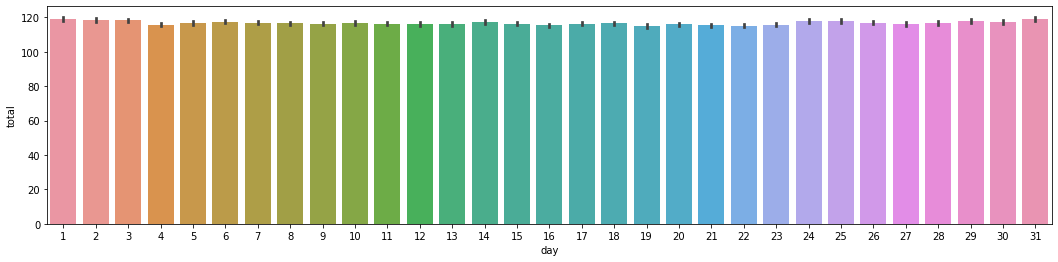

In [51]:
figure, ax = plt.subplots()
figure.set_size_inches(18, 4)
sns.barplot(data=train, x="day", y="total")

24일부터 3일까지 **날짜별 평균 매출 총액**이 가장 높습니다.

이는 경제 활동 인구의 급여가 월 후반에 들어오는 것과 연결되어 있기 때문이라고 판단됩니다.

**year, month, day 컬럼에 대한 countplot을 한 데 모아 시각화하겠습니다.**

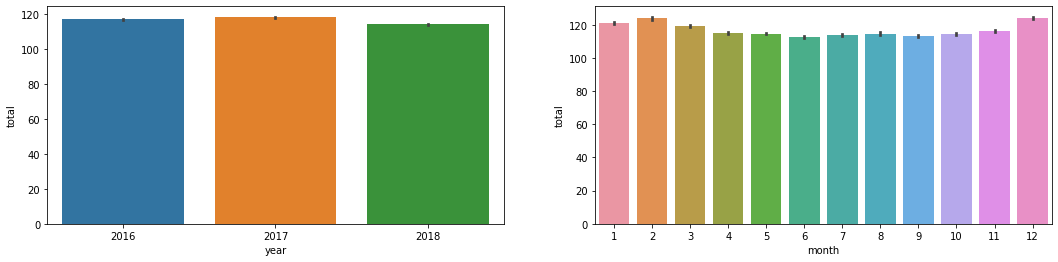

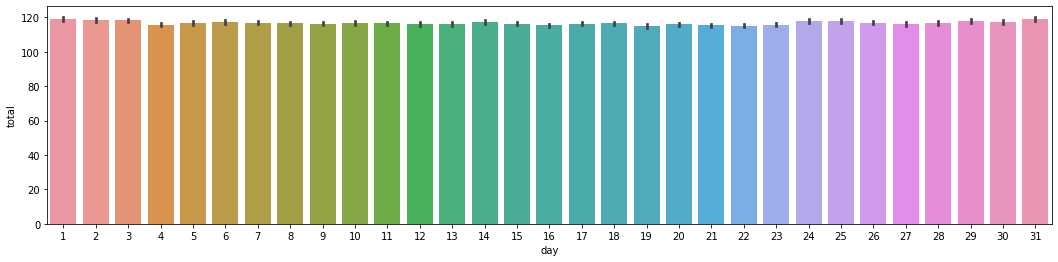

In [52]:
figure , (ax1,ax2) = plt.subplots(nrows = 1,ncols = 2)
figure.set_size_inches(18,4)
sns.barplot(data = train, x = 'year', y = 'total', ax = ax1)
sns.barplot(data = train, x = 'month', y = 'total', ax = ax2)

figure , ax3 = plt.subplots(nrows = 1, ncols = 1)
figure.set_size_inches(18,4)
sns.barplot(data = train, x = 'day', y = 'total',ax = ax3)

## days_of_week

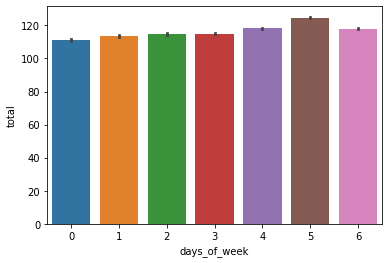

In [53]:
sns.barplot(data = train, x = 'days_of_week', y = 'total')

**요일별 평균 매출 총액**을 확인했습니다.

월요일(0)부터 토요일(6)까지 꾸준하게 상승해 토요일에 가장 많은 매출일 일어나는 것을 확인했습니다.


토요일과 일요일 모두 주말이지만, 일요일은 토요일에 비해 크게 줄었습니다.


**요일별 평균 매출 총액을 통해 주말에 경제 활동이 많은 것을 확인했습니다.**


holyday를 기준으로 요일별 매출 총액을 다시 확인해보겠습니다

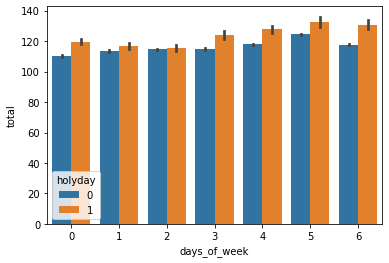

In [54]:
sns.barplot(data = train, x = 'days_of_week', y = 'total', hue = 'holyday')

예측대로 평일에 비해 공휴일에 평균 매출 총액이 높은 것을 확인할 수 있으며, 그 차이는 금(4), 토(5), 일(6)에 더 크게 드러납니다.

## hour

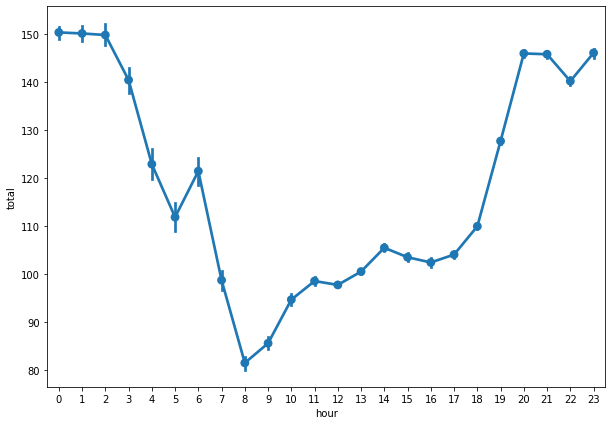

In [55]:
plt.figure(figsize=(10,7))
sns.pointplot(data = train, x = 'hour', y = 'total')

시간별 매출 총액 평균을 pointplot으로 확인했습니다
퇴근 시간인 오후 6시 부터 급격히 상승하기 시작하면서 자정부터 새벽 2시까지 매출액이 가장 높고, 이후로 점차 줄어들면서 오전 8시까지 점차적으로 하락하는 것을 확인할 수 있습니다.


요일에 따라 시간별 매출 총액 평균을 확인해보겠습니다.

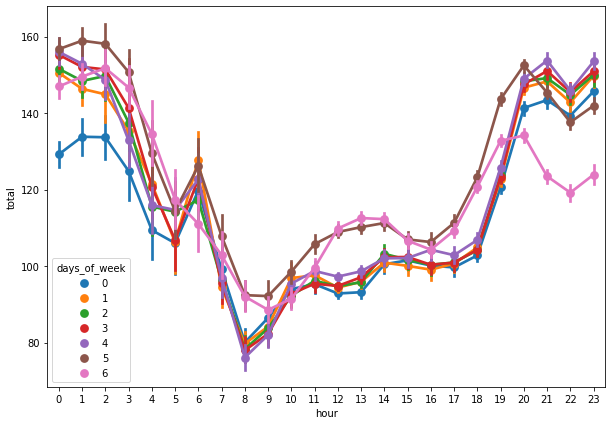

In [56]:
plt.figure(figsize=(10,7))
sns.pointplot(data = train, x = 'hour', y = 'total', hue = 'days_of_week')

일요일(6)을 제외한 모든 요일에 대해서 시간별 매출 양상이 비슷하게 나타나고 있습니다.

특징적인 것으로는 일요일은 비교적 오후 8시 이후부터 매출액이 감소하고 있습니다. 다음날 출근을 위해 외출을 자제하는 성향에 기인하는 것으로 예측할 수 있습니다.

그리고 다른 요일에 비해 월요일은 자정부터 새벽 2시까지의 매출 총액이 다른 요일에 비해 비교적 적습니다. 

월요일은 비교적 경제 활동 인구가 빨리 귀가하는 것이라고 판단됩니다.

다음으로 공휴일/평일 기준으로 시간별 매출 총액을 확인해보겠습니다

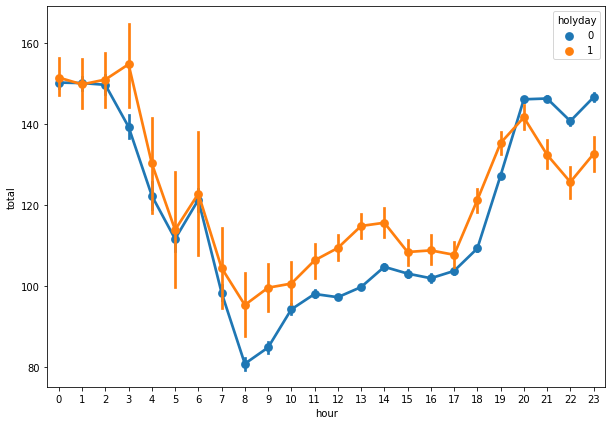

In [57]:
plt.figure(figsize=(10,7))
sns.pointplot(data = train, x = 'hour', y = 'total', hue = 'holyday')

공휴일의 매출 총액이 평일의 매출 총액보다 전체적으로 높게 위치하고 있음을 알 수 있습니다. 

그 차이는 오전 7시부터 오후 7시까지 크게 나타나며, 오후 8시부터 11시 까지는 공휴일의 매출 총액이 큰 차이로 줄어고 있습니다.


뿐만 아니라 공휴일의 시간별 매출 총액의 편차는 평일보다 크게 나타납니다. 

특히 새벽시간에 그 편차가 크게 나타나고 있는데, 이는 다음날이 쉬는 날인지 여부에 따라 그 값의 차이가 크게 나타나는 것이라고 예측합니다. 

이를 확인하기 위해 다음날이 주말 또는 휴일인지를 확인하는 column을 추가해 검증해보도록 하겠습니다.


nextday_holiday컬럼을 생성해 0을 집어 넣고, 다음날이 주말인 경우와 holyday인 경우를 1로 채워 넣겠습니다.


금요일과 토요일은 다음날이 주말이기 때문에 우선 nextday_holiday 컬럼을 1로 채워 넣겠습니다

In [58]:
train["nextday_holiday"] = 0

In [59]:
train.loc[(train["days_of_week"] == 4) | (train["days_of_week"] == 5), "nextday_holiday"] = 1

다음날이 공휴일인지 확인하기 위해 nextday_year, nextday_month, nextday_day 컬럼을 만들고, 이를 이용해 nextday 컬럼을 채우도록 하겠습니다.

nextday_year 컬럼은 year값을 복사합니다(추후 변경)

nextday_month 컬럼은 month값을 복사합니다(추후 변경)

In [60]:
train["nextday_year"] = train["year"]

In [61]:
train["nextday_month"] = train["month"]

In [62]:
train["nextday_day"] = train["day"] + 1

day값이 마지막 날짜인 경우, nextday_day값은 1로 채워져야 합니다.

연도별, 월별 마지막 날짜를 확인해보겠습니다.

데이터 집계가 2016년 8월부터 2018년 7월까지 이기 때문에 아래의 정보만 확인해보겠습니다.

2016년 8월 - 31일, 9월 - 30일, 10월 - 31일, 11월 - 30일, 12월 - 31일

2017년 1월 - 31일, 2월 - 28일, 3월 - 31일, 4월 - 30일, 5월 - 31일, 6월 - 30일, 7월 - 31일, 8월 - 31일, 9월 - 30일, 10월 - 31일, 11월 - 30일, 12월 - 31일

2018년 1월 - 31일, 2월 - 28일, 3월 - 31일, 4월 - 30일, 5월 - 31일, 6월 - 30일, 7월 - 31일, 8월 - 31일

In [63]:
# 2016년 12월 31일의 다음날은 2017년 1월 1이므로 연도와 월, 날짜 모두 변경되어야 한다
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2016) & (train["month"] == 12), "nextday_year"] = train["year"] + 1
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2016) & (train["month"] == 12), "nextday_month"] = 1

# 마지막 날짜가 31일인 달(12월 제외)
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2016) & ((train["month"] == 8) | (train["month"] == 10) | (train["month"] == 12)), "nextday_day"] = 1
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2016) & ((train["month"] == 8) | (train["month"] == 10)), "nextday_month"] = train["month"] + 1

# 마지막 날짜가 30일인 달
train.loc[(train["nextday_day"] == 31) & (train["year"] == 2016) & ((train["month"] == 9) | (train["month"] == 11)), "nextday_day"] = 1
train.loc[(train["nextday_day"] == 31) & (train["year"] == 2016) & ((train["month"] == 9) | (train["month"] == 11)), "nextday_month"] = train["month"] + 1

In [64]:
# 2017년 12월 31일의 다음날은 2018년 1월 1이므로 연도와 월, 날짜 모두 변경되어야 한다
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2017) & (train["month"] == 12), "nextday_year"] = train["year"] + 1
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2017) & (train["month"] == 12), "nextday_month"] = 1
# 마지막 날짜가 31일인 달(12월 제외)
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2017) & ((train["month"] == 1) | (train["month"] == 3) | (train["month"] == 5) | (train["month"] == 7) | (train["month"] == 8) | (train["month"] == 10) | (train["month"] == 12)), "nextday_day"] = 1
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2017) & ((train["month"] == 1) | (train["month"] == 3) | (train["month"] == 5) | (train["month"] == 7) | (train["month"] == 8) | (train["month"] == 10)), "nextday_month"] = train["month"] + 1
# 마지막 날짜가 30일인 달
train.loc[(train["nextday_day"] == 31) & (train["year"] == 2017) & ((train["month"] == 4) | (train["month"] == 6) | (train["month"] == 9) | (train["month"] == 11)), "nextday_day"] = 1
train.loc[(train["nextday_day"] == 31) & (train["year"] == 2017) & ((train["month"] == 4) | (train["month"] == 6) | (train["month"] == 9) | (train["month"] == 11)), "nextday_month"] = train["month"] + 1
# 마지막 날짜가 28일인 달
train.loc[(train["nextday_day"] == 29) & (train["year"] == 2017) & (train["month"] == 2), "nextday_day"] = 1
train.loc[(train["nextday_day"] == 29) & (train["year"] == 2017) & (train["month"] == 2), "nextday_month"] = train["month"] + 1

In [65]:
# 마지막 날짜가 31일인 달
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2017) & ((train["month"] == 1) | (train["month"] == 3) | (train["month"] == 5) | (train["month"] == 7) | (train["month"] == 8)), "nextday_day"] = 1
train.loc[(train["nextday_day"] == 32) & (train["year"] == 2017) & ((train["month"] == 1) | (train["month"] == 3) | (train["month"] == 5) | (train["month"] == 7) | (train["month"] == 8)), "nextday_month"] = train["month"] + 1
# 마지막 날짜가 30일인 달
train.loc[(train["nextday_day"] == 31) & (train["year"] == 2017) & ((train["month"] == 4) | (train["month"] == 6)), "nextday_day"] = 1
train.loc[(train["nextday_day"] == 31) & (train["year"] == 2017) & ((train["month"] == 4) | (train["month"] == 6)), "nextday_month"] = train["month"] + 1
# 마지막 날짜가 28일인 달
train.loc[(train["nextday_day"] == 29) & (train["year"] == 2017) & (train["month"] == 2), "nextday_day"] = 1
train.loc[(train["nextday_day"] == 29) & (train["year"] == 2017) & (train["month"] == 2), "nextday_month"] = train["month"] + 1

In [66]:
train["nextday_year_str"] = train["nextday_year"].astype(str)
train["nextday_month_str"] = train["nextday_month"].astype(str)
train["nextday_day_str"] = train["nextday_day"].astype(str)

In [67]:
for month in range(10):
    train.loc[(train["nextday_month_str"] == str(month)), "nextday_month_str"] = "0" + str(month)

In [68]:
for day in range(10):
    train.loc[(train["nextday_day_str"] == str(day)), "nextday_day_str"] = "0" + str(day)

In [69]:
train["nextday_date"] = train["nextday_year_str"] + "-" + train["nextday_month_str"] + "-" + train["nextday_day_str"]

nextday_date컬럼과 date컬럼을 비교해 확인합니다

In [70]:
train[["date", "nextday_date"]].head()

,date,nextday_date
0,2016-12-14,2016-12-15
1,2016-12-14,2016-12-15
2,2016-12-19,2016-12-20
3,2016-12-19,2016-12-20
4,2016-12-19,2016-12-20


In [71]:
train_holiday = train.loc[train["holyday"] == 1]
print(train_holiday.shape)
train_holiday.head()

(147622, 24)


,index,store_id,date,time,card_id,amount,installments,days_of_week,holyday,total,year,month,day,hour,minute,second,nextday_holiday,nextday_year,nextday_month,nextday_day,nextday_year_str,nextday_month_str,nextday_day_str,nextday_date
772,772,0,2016-12-25,00:23:22,7df04debf0,79,1.0,6,1,79.0,2016,12,25,0,23,22,0,2016,12,26,2016,12,26,2016-12-26
773,773,0,2016-12-25,00:34:09,0cd162eeb9,151,1.0,6,1,151.0,2016,12,25,0,34,9,0,2016,12,26,2016,12,26,2016-12-26
774,774,0,2016-12-25,01:11:57,3c62f0c4fd,38,1.0,6,1,38.0,2016,12,25,1,11,57,0,2016,12,26,2016,12,26,2016-12-26
775,775,0,2016-12-25,01:19:19,5d6c78f689,14,1.0,6,1,14.0,2016,12,25,1,19,19,0,2016,12,26,2016,12,26,2016-12-26
776,776,0,2016-12-25,01:22:11,5d6c78f689,25,1.0,6,1,25.0,2016,12,25,1,22,11,0,2016,12,26,2016,12,26,2016-12-26


train_holiday의 date값을 중복되지 않게 list로 만듭니다

In [72]:
my_list = train_holiday["date"].values
uniqueVals = np.unique(my_list)
holiday_date_list = uniqueVals.tolist()

In [73]:
holiday_date_list

['2016-08-15',
 '2016-09-14',
 '2016-09-15',
 '2016-09-16',
 '2016-10-03',
 '2016-10-09',
 '2016-12-25',
 '2017-01-01',
 '2017-01-27',
 '2017-01-28',
 '2017-01-29',
 '2017-01-30',
 '2017-03-01',
 '2017-05-01',
 '2017-05-03',
 '2017-05-05',
 '2017-05-09',
 '2017-06-06',
 '2017-08-15',
 '2017-10-02',
 '2017-10-03',
 '2017-10-04',
 '2017-10-05',
 '2017-10-06',
 '2017-10-09',
 '2017-12-25',
 '2018-01-01',
 '2018-02-15',
 '2018-02-16',
 '2018-02-17',
 '2018-03-01',
 '2018-05-01',
 '2018-05-05',
 '2018-05-07',
 '2018-05-22',
 '2018-06-06',
 '2018-06-13']

train 데이터의 nextday_date값이 holiday_date_list에 속해있으면, nextday_holiday컬럼의 값을 1로 채웁니다

In [74]:
idx = [idx for idx, value in enumerate(train["nextday_date"]) if value in holiday_date_list]

In [75]:
train.loc[idx, "nextday_holiday"].apply(lambda x : 1)

625        1
626        1
627        1
628        1
629        1
          ..
3311313    1
3311314    1
3311315    1
3311316    1
3311317    1
Name: nextday_holiday, Length: 147748, dtype: int64

nextday_holiday에 따라 시간별 평균 매출 총액을 pointplot으로 확인합니다

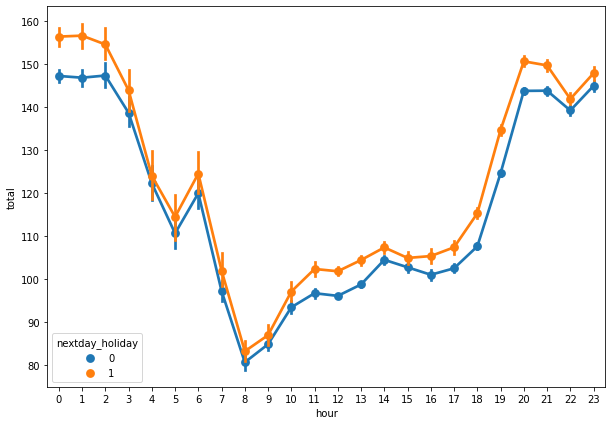

In [76]:
plt.figure(figsize=(10, 7))
sns.pointplot(data=train, x="hour", y="total", hue="nextday_holiday")

이 그래프를 통해 holyday기준으로 시간별 매출 총액을 나타냈을 때보다 뚜렷하게 확인할 수 있는 몇 가지 사실이 있습니다.

첫째로, 모든 시간에 대해 다음날이 휴일인 경우의 매출 총액이 높게 나온다는 점입니다.

특히 늦은 저녁 및 새벽 시간에 그 차이가 크다는 것을 확인할 수 있습니다.

둘째로, 시간별 매출 총액의 편차(point의 bar)가 holyday기준 그래프보다 훨씬 작다는 것을 확인할 수 있습니다. 

따라서 타겟 컬럼에 따라 holyday를 기준으로 구분할 것인지, nextday_holiday를 기준으로 구분할 것인지 선택한다면 좋은 결과를 얻을 수 있을 것이라 생각합니다

이해를 돕기 위해 두 가지 그래프를 모아보겠습니다

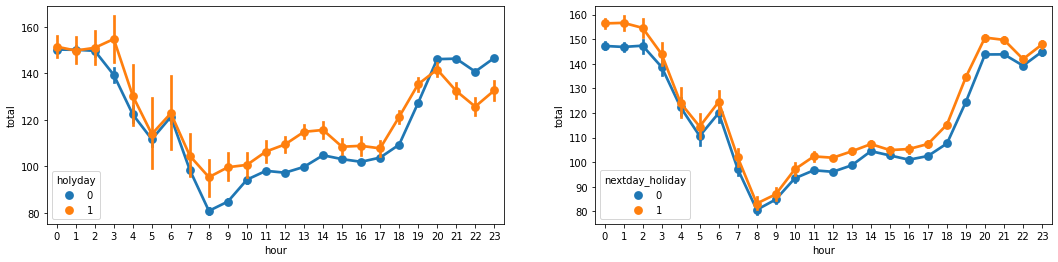

In [77]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)
sns.pointplot(data=train, x="hour", y="total", hue="holyday", ax=ax1)
sns.pointplot(data=train, x="hour", y="total", hue="nextday_holiday", ax=ax2)

확실히 feature engineering을 통해 만든 우측의 nextday_holiday 컬럼 그래프가 시간 별 매출 총액 편차가 적다는 것을 확인할 수 있습니다.

## amount

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


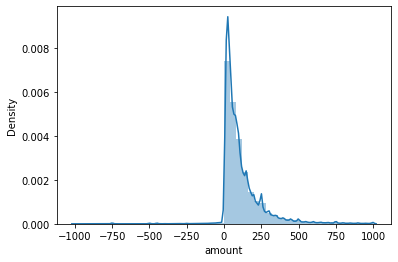

In [78]:
sns.distplot(train["amount"])

amount 컬럼의 분포를 확인해보았습니다.

환불 기록을 제외하고 **대부분의 매출액은 150 이하**에서 일어나고 있음을 확인할 수 있습니다. 

환불 기록을 제외하고 분포를 살펴보도록 하겠습니다

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


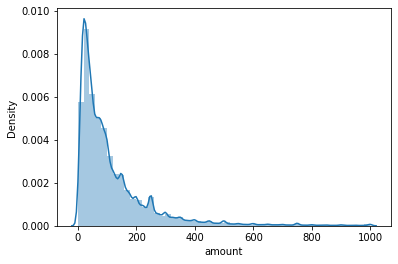

In [79]:
train_over0 = train.loc[train["amount"] >= 0]
sns.distplot(train_over0["amount"])

amount의 분포 범위를 0이상으로 제한시켰습니다. 

매출액의 분포 범위를 좀 더 정확히 확인 가능합니다.

20~40 영역에서 가장 많은 매출 기록이 있으며, 매출액의 대부분은 100이하임을 확인할 수 있습니다.

amount 컬럼은 좌편향 되어 있기 때문에 이를 model에 적용할 경우 **normalize를 할 필요**가 있습니다
이를 위해 **log transformation**을 이용합니다

로그 변환 시에 '0'부터 시작하는 경우,

'0'을 로그 취하면 마이너스 무한대가 나오기 때문에 1을 더해서 오른쪽으로 1씩 이동시킨 후에 로그변환을 취했습니다.

In [80]:
train_over0["amount_plus_one"] = (train_over0["amount"]) + 1 
train_over0["log_amount"] = (np.log(train_over0["amount_plus_one"]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


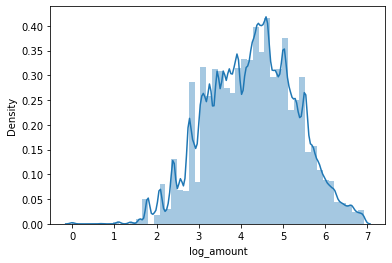

In [81]:
sns.distplot(train_over0["log_amount"])

log(amount+1) 를 이용해 보다 정규분포 형태에 가까운 모습을 만들었습니다.

**data를 분포 범위 내에서 고르게 퍼트리는 일은 model이 학습을 할 때 중요한 요소 이기 때문에 항상 유념하고 있어야 합니다.**

## total, installments

total 컬럼의 값이 0 이상인 경우에 한해 total과 instamllments의 상관 관계를 확인해보겠습니다

In [82]:
total_over0 = train.loc[train["total"] >= 0]

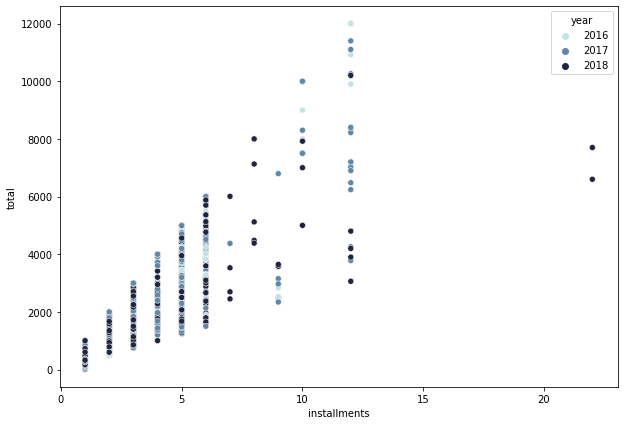

In [83]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
plt.figure(figsize=(10, 7))
sns.scatterplot(data=total_over0, x="installments", y="total", hue="year", palette=cmap)

total과 installments의 상관관계를 scatterplot을 이용해 확인해보았습니다.

total 총액이 높을 수록 계산의 분할 횟수가 높게 나타나는 것을 확인할 수 있습니다.

높은 금액을 한 번에 지불하기 어렵기 때문에 두 변수 사이의 비례 관계가 나타났다고 생각합니다.